In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, ClassicalRegister, QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi 
from qiskit.extensions import UnitaryGate
from qiskit.extensions import HamiltonianGate
from qiskit.circuit.library import PhaseEstimation
from qiskit.algorithms import HamiltonianPhaseEstimation
 

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# import basic plot tools
from qiskit.visualization import plot_histogram

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
H =    [[0.00125268, 0.01001185, 0.00127092, 0.01446157, 0.00813463,
        0.00122314, 0.00139337, 0.0011896 ],
       [0.01001185, 0.00252688, 0.0011896 , 0.00813463, 0.01446157,
        0.00139337, 0.00122314, 0.00127092],
       [0.00127092, 0.0011896 , 0.01599429, 0.00139337, 0.00099804,
        0.00813463, 0.01446157, 0.00351768],
       [0.01446157, 0.00813463, 0.00139337, 0.00351238, 0.00351768,
        0.0011896 , 0.00127092, 0.00099804],
       [0.00813463, 0.01446157, 0.00099804, 0.00351768, 0.00238393,
        0.00127092, 0.0011896 , 0.00139337],
       [0.00122314, 0.00139337, 0.00813463, 0.0011896 , 0.00127092,
        0.02774125, 0.01001185, 0.01446157],
       [0.00139337, 0.00122314, 0.01446157, 0.00127092, 0.0011896 ,
        0.01001185, 0.01982472, 0.00813463],
       [0.0011896 , 0.00127092, 0.00351768, 0.00099804, 0.00139337,
        0.01446157, 0.00813463, 0.01292287]]

In [3]:
U = HamiltonianGate(H,20*np.pi,label="CU") #
print(U)

Instruction(name='hamiltonian', num_qubits=3, num_clbits=0, params=[array([[0.00125268+0.j, 0.01001185+0.j, 0.00127092+0.j, 0.01446157+0.j,
        0.00813463+0.j, 0.00122314+0.j, 0.00139337+0.j, 0.0011896 +0.j],
       [0.01001185+0.j, 0.00252688+0.j, 0.0011896 +0.j, 0.00813463+0.j,
        0.01446157+0.j, 0.00139337+0.j, 0.00122314+0.j, 0.00127092+0.j],
       [0.00127092+0.j, 0.0011896 +0.j, 0.01599429+0.j, 0.00139337+0.j,
        0.00099804+0.j, 0.00813463+0.j, 0.01446157+0.j, 0.00351768+0.j],
       [0.01446157+0.j, 0.00813463+0.j, 0.00139337+0.j, 0.00351238+0.j,
        0.00351768+0.j, 0.0011896 +0.j, 0.00127092+0.j, 0.00099804+0.j],
       [0.00813463+0.j, 0.01446157+0.j, 0.00099804+0.j, 0.00351768+0.j,
        0.00238393+0.j, 0.00127092+0.j, 0.0011896 +0.j, 0.00139337+0.j],
       [0.00122314+0.j, 0.00139337+0.j, 0.00813463+0.j, 0.0011896 +0.j,
        0.00127092+0.j, 0.02774125+0.j, 0.01001185+0.j, 0.01446157+0.j],
       [0.00139337+0.j, 0.00122314+0.j, 0.01446157+0.j, 0.0012

In [4]:
#HamiltonianPhaseEstimation(U)

In [5]:
qpe = QuantumCircuit(13, 10)
#qpe.draw(scale=2)

In [6]:
for qubit in range(10):
    qpe.h(qubit)
#qpe.draw(scale=2)

In [7]:
#PhaseEstimation(3,U)

In [8]:
CU = U.control(label="control")
print(CU)

Instruction(name='chamiltonian', num_qubits=4, num_clbits=0, params=[array([[0.00125268+0.j, 0.01001185+0.j, 0.00127092+0.j, 0.01446157+0.j,
        0.00813463+0.j, 0.00122314+0.j, 0.00139337+0.j, 0.0011896 +0.j],
       [0.01001185+0.j, 0.00252688+0.j, 0.0011896 +0.j, 0.00813463+0.j,
        0.01446157+0.j, 0.00139337+0.j, 0.00122314+0.j, 0.00127092+0.j],
       [0.00127092+0.j, 0.0011896 +0.j, 0.01599429+0.j, 0.00139337+0.j,
        0.00099804+0.j, 0.00813463+0.j, 0.01446157+0.j, 0.00351768+0.j],
       [0.01446157+0.j, 0.00813463+0.j, 0.00139337+0.j, 0.00351238+0.j,
        0.00351768+0.j, 0.0011896 +0.j, 0.00127092+0.j, 0.00099804+0.j],
       [0.00813463+0.j, 0.01446157+0.j, 0.00099804+0.j, 0.00351768+0.j,
        0.00238393+0.j, 0.00127092+0.j, 0.0011896 +0.j, 0.00139337+0.j],
       [0.00122314+0.j, 0.00139337+0.j, 0.00813463+0.j, 0.0011896 +0.j,
        0.00127092+0.j, 0.02774125+0.j, 0.01001185+0.j, 0.01446157+0.j],
       [0.00139337+0.j, 0.00122314+0.j, 0.01446157+0.j, 0.001

In [9]:
repetitions = 1
#CU = U#.to_gate().control(1)
for counting_qubit in range(10):
    for i in range(repetitions):
        qpe.append(CU,[counting_qubit,10,11,12])
        #qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
    repetitions *= 2
#qpe.draw(scale=1.5)

In [10]:
#straight from the tutorial:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [11]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 10)
# Measure
qpe.barrier()
for n in range(10):
    qpe.measure(n,n)

In [12]:
#qpe.draw()

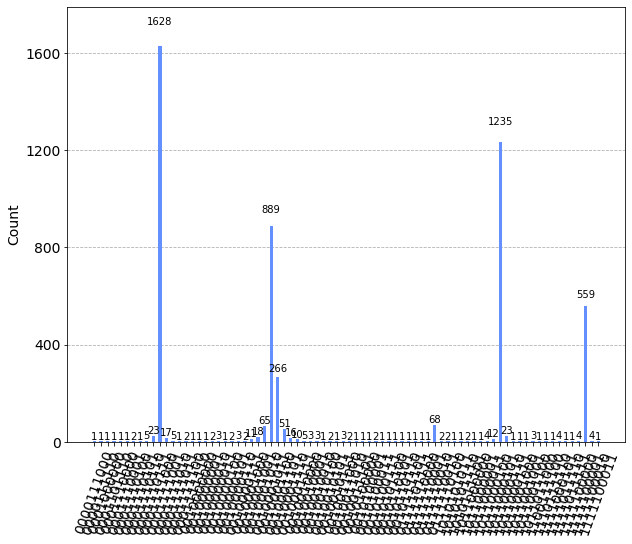

In [13]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 5000#2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer,figsize=(10,8))

In [14]:
print(answer)

{'0010000000': 1, '1100111100': 1, '1011000111': 1, '0010110101': 1, '1111011111': 1, '1011011000': 1, '0001111110': 1, '0001110001': 1, '1111100011': 1, '0010111101': 1, '0010000010': 2, '1011000001': 1, '1011000110': 23, '0001111011': 1, '0111110010': 68, '0001111000': 1628, '1011000100': 12, '0001111001': 17, '0001110110': 5, '1011000000': 1, '1010101011': 1, '0001000000': 1, '1111100000': 4, '1011001000': 1, '0001111100': 2, '1010111101': 2, '0010001100': 266, '0010100000': 1, '0010001011': 889, '0010001110': 16, '0010000011': 3, '0001111010': 5, '1011000101': 1235, '1011000011': 4, '0010011010': 2, '0111110100': 2, '0010010000': 5, '0010000100': 1, '0010001101': 51, '1111011110': 1, '0010001010': 65, '0010000001': 1, '1111000101': 4, '0010011101': 1, '1011001001': 1, '0010010100': 1, '0010000110': 3, '0010100001': 1, '0010000111': 2, '0010100111': 1, '0111110011': 2, '1011001100': 3, '0010010010': 3, '1010101110': 1, '0111110001': 1, '0001110111': 23, '0010110110': 1, '0010000101'

In [15]:
print(max(answer, key=answer.get))

0001111000


In [16]:
print(sorted(answer, key=answer.get, reverse=True)[0:8])

['0001111000', '1011000101', '0010001011', '1111100001', '0010001100', '0111110010', '0010001010', '0010001101']


In [17]:
myList = sorted(answer, key=answer.get, reverse=True)[0:8]
output_list = []
for element in myList:
    value = int(element,2)
    output_list.append(value)
print("The input list is:", myList)
print("The output list is:", sorted(output_list))

The input list is: ['0001111000', '1011000101', '0010001011', '1111100001', '0010001100', '0111110010', '0010001010', '0010001101']
The output list is: [120, 138, 139, 140, 141, 498, 709, 993]
